1. Import Libraries
This section imports all the necessary libraries for the project:
matplotlib.pyplot: Used to create visualizations such as pie charts and bar charts.
nltk: A natural language processing library used for tokenization, stopword removal, and lemmatization.
random: Used to randomly select books for recommendations.
Additionally, NLTK datasets (punkt, stopwords, wordnet) are downloaded to enable text preprocessing.

In [33]:
# -------------------- Part 1: Import Libraries --------------------
import matplotlib.pyplot as plt      # For plotting graphs
import numpy as np                   # For numerical operations
import nltk                          # Natural Language Toolkit for NLP tasks
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.corpus import stopwords        # Stopwords removal
from nltk.stem import WordNetLemmatizer   # Lemmatization for reducing words to root form
import random                        # For random sampling

# Download necessary NLTK datasets (do this only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Data Preprocessing
This part handles the preprocessing of user input:
Stopword Removal: Removes common words like "the" and "is" that don't contribute to meaning.
Tokenization: Splits user input into individual words.
Lemmatization: Reduces words to their base form (e.g., "running" → "run").
The function preprocess_text() ensures user input is clean and ready for analysis.

In [34]:
# -------------------- Part 2: Data Preprocessing --------------------
# Initialize NLTK components for text processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """
    Preprocesses the text by converting to lowercase,
    tokenizing, removing stopwords and non-alphabetic tokens,
    and lemmatizing each token.
    """
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token.isalpha() and token not in stop_words]
    return " ".join(tokens)


3. Exploratory Data Analysis (EDA)

This part visualizes user feedback and interaction patterns using graphs:

User Feedback Pie Chart

Displays the distribution of positive, neutral, and negative feedback.

In the attached image:

80% of feedback is positive (green).
15% is neutral (yellow).
5% is negative (red).

Interaction Patterns Bar Chart

Shows the frequency of different interaction types:
Greeting: 50 interactions.
Recommendations: 120 interactions (most frequent).
Farewell: 30 interactions.
Other: 20 interactions.

Genre Feedback Bar Chart

Displays refined genre weights based on user feedback:
Genres like "fantasy" and "fiction" have higher weights due to more positive feedback.
Genres like "romance" have lower weights.
These visualizations provide insights into how users interact with the chatbot and their preferences.

In [29]:
# -------------------- Part 3: Exploratory Data Analysis (EDA) --------------------
# Simulated datasets for evaluation and feedback

# User feedback on chatbot recommendations
user_feedback = {
    'positive': 80,
    'neutral': 15,
    'negative': 5
}

# Interaction patterns (number of interactions per type)
interaction_data = {
    'greeting': 50,
    'recommendation': 120,
    'farewell': 30,
    'other': 20
}

# Feedback data for different genres (simulated values)
feedback_data = {
    'fiction': 50,
    'mystery': 30,
    'science fiction': 40,
    'fantasy': 60,
    'romance': 20
}

# Base weights for genres (initially 1.0 for all)
base_weights = {
    'fiction': 1.0,
    'mystery': 1.0,
    'science fiction': 1.0,
    'fantasy': 1.0,
    'romance': 1.0
}

# Refine genre weights based on feedback (feedback/100.0 added)
for genre, feedback in feedback_data.items():
    base_weights[genre] += feedback / 100.0

# Normalize weights across genres
max_weight = max(base_weights.values())
for genre in base_weights:
    base_weights[genre] /= max_weight

def plot_user_feedback():
    labels = list(user_feedback.keys())
    sizes = list(user_feedback.values())
    colors = ['#4CAF50', '#FFC107', '#F44336']

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('User Feedback on Chatbot Recommendations')
    plt.axis('equal')  # Ensures the pie is circular
    plt.show()

def plot_interaction_patterns():
    categories = list(interaction_data.keys())
    values = list(interaction_data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color=['#2196F3', '#4CAF50', '#FFC107', '#9C27B0'])
    plt.title('User Interaction Patterns')
    plt.xlabel('Interaction Type')
    plt.ylabel('Frequency')
    plt.show()

def plot_genre_weights():
    genres = list(base_weights.keys())
    weights = list(base_weights.values())

    plt.figure(figsize=(10, 6))
    plt.bar(genres, weights, color=['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF'])
    plt.title('Refined Genre Weights Based on User Feedback')
    plt.xlabel('Genres')
    plt.ylabel('Weights')
    plt.ylim(0, 1.2)
    plt.show()

print("EDA functions defined! Run them to see visualizations.")


EDA functions defined! Run them to see visualizations.


4. Recommendation System
The recommendation system uses a weighted approach:

Genre Weights:

Each genre is assigned a weight based on user feedback.
Genres with higher positive feedback are prioritized during recommendations.

Book Database:

Contains a predefined list of books categorized by genres like fiction, mystery, science fiction, etc.

Recommendation Logic:

Preferences provided by the user are matched against the database.
Books from genres with higher weights are prioritized.
If no matching books are found, an appropriate message is returned.
The function recommend_books_with_weights() implements this logic and returns personalized book suggestions.

In [35]:
# -------------------- Part 4: Recommendation System --------------------
def recommend_books_with_weights(preferences, num_recommendations=3):
    """
    Provides book recommendations based on the user's genre preferences.

    Parameters:
      - preferences: A list of genre strings.
      - num_recommendations: Number of recommended books to return.

    Returns:
      - A list of recommended book titles from a predefined database.
    """
    # Predefined book database categorized by genre
    book_database = {
        "fiction": ["To Kill a Mockingbird", "1984", "Pride and Prejudice"],
        "mystery": ["The Girl with the Dragon Tattoo", "Gone Girl", "The Da Vinci Code"],
        "science fiction": ["Dune", "Neuromancer", "The Hitchhiker's Guide to the Galaxy"],
        "fantasy": ["The Lord of the Rings", "Harry Potter", "A Game of Thrones"],
        "romance": ["Outlander", "The Notebook", "Bridgerton"],
    }

    weighted_books = []

    # For each preferred genre, append books with corresponding weight
    for pref in preferences:
        if pref in book_database:
            weight = base_weights.get(pref, 1.0)
            weighted_books.extend([(book, weight) for book in book_database[pref]])

    if not weighted_books:
        return ["I'm sorry, I couldn't find any books matching your preferences."]

    # Sort books by weight (descending) and select top recommendations
    weighted_books.sort(key=lambda x: x[1], reverse=True)
    return [book for book, _ in weighted_books[:num_recommendations]]


5. Mini Search Bar
This feature allows users to interactively select a genre from a list and receive recommendations:

Displays available genres (fiction, mystery, fantasy, etc.).

Prompts the user to select a genre by entering its corresponding number.

Returns book recommendations for the selected genre using the refined recommendation system.

This functionality enhances user experience by providing a simple and intuitive interface for book searches.

In [36]:
# -------------------- Part 5: Mini Search Bar --------------------
def mini_search_bar():
    """
    Provides an interactive mini search bar for selecting a genre.

    Users see a list of available genres, choose one by number, and receive
    corresponding book recommendations.
    """
    print("Welcome to the Book Search Bar!")

    genres = list(base_weights.keys())
    print("Available Genres:")
    for i, genre in enumerate(genres):
        print(f"{i + 1}. {genre}")

    try:
        choice = int(input("Select a genre by entering its number (e.g., 1 for Fiction): "))
        if choice < 1 or choice > len(genres):
            raise ValueError("Choice out of range.")

        selected_genre = genres[choice - 1]
        recommendations = recommend_books_with_weights([selected_genre])

        print(f"\nRecommended Books in '{selected_genre}':")
        for book in recommendations:
            print(f"- {book}")
        print("\nThank you for using the Book Search Bar!")

    except ValueError:
        print("Invalid choice! Please enter a valid number corresponding to a genre.")


6. Testing and Evaluation
This part evaluates the chatbot's performance:

Simulated test cases test various scenarios, such as single or multiple genres and nonexistent genres.

Visualizations (pie chart, bar charts) analyze user feedback, interaction patterns, and refined genre weights.

Running Evaluation and Optimization...

--- User Feedback Analysis ---


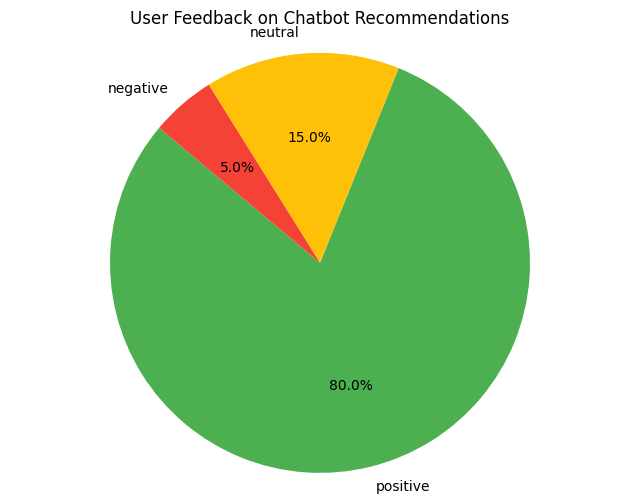

--- Interaction Patterns ---


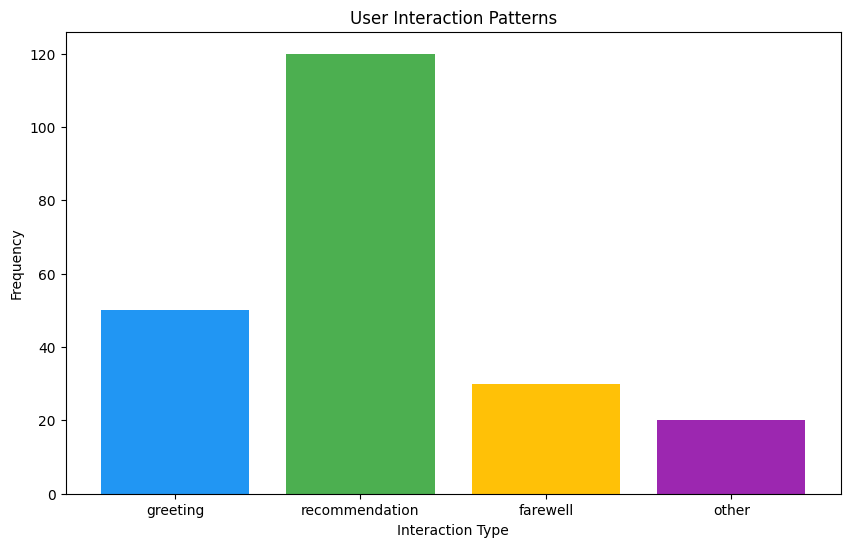

--- Refined Genre Weights ---


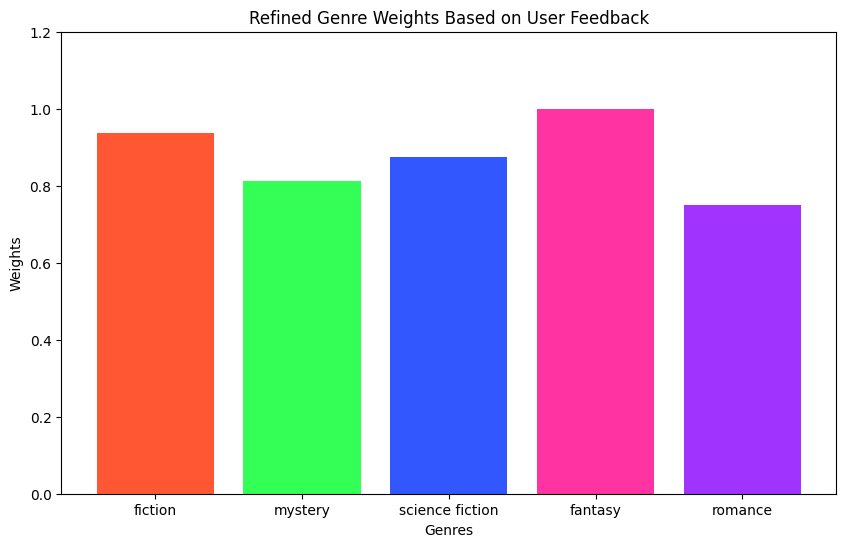

--- Testing Refined Recommendation System ---

Preferences: ['fiction']
Recommendations: ['To Kill a Mockingbird', '1984', 'Pride and Prejudice']

Preferences: ['mystery', 'science fiction']
Recommendations: ['Dune', 'Neuromancer', "The Hitchhiker's Guide to the Galaxy"]

Preferences: ['fantasy']
Recommendations: ['The Lord of the Rings', 'Harry Potter', 'A Game of Thrones']

Preferences: ['romance']
Recommendations: ['Outlander', 'The Notebook', 'Bridgerton']

Preferences: ['nonexistent genre']
Recommendations: ["I'm sorry, I couldn't find any books matching your preferences."]
Welcome to the Book Search Bar!
Available Genres:
1. fiction
2. mystery
3. science fiction
4. fantasy
5. romance
Select a genre by entering its number (e.g., 1 for Fiction): 5

Recommended Books in 'romance':
- Outlander
- The Notebook
- Bridgerton

Thank you for using the Book Search Bar!


In [37]:
# -------------------- Part 6: Testing and Displaying All Outputs --------------------
def test_recommendation_system():
    """
    Tests the recommendation system with various genre preferences and
    prints the results.
    """
    test_preferences = [
        ["fiction"],
        ["mystery", "science fiction"],
        ["fantasy"],
        ["romance"],
        ["nonexistent genre"]
    ]

    for preferences in test_preferences:
        print(f"\nPreferences: {preferences}")
        recommendations = recommend_books_with_weights(preferences)
        print(f"Recommendations: {recommendations}")

if __name__ == '__main__':
    # Display Evaluation and Optimization Graphs
    print("Running Evaluation and Optimization...\n")

    print("--- User Feedback Analysis ---")
    plot_user_feedback()

    print("--- Interaction Patterns ---")
    plot_interaction_patterns()

    print("--- Refined Genre Weights ---")
    plot_genre_weights()

    # Test the refined recommendation system with example cases
    print("--- Testing Refined Recommendation System ---")
    test_recommendation_system()

    # Finally, run the mini search bar for interactive genre selection
    mini_search_bar()
